# **Impact of Media Advertising on Sales Performance**

## **Business Problem**
Analyze advertising data to determine how much each media channel (TV, radio, newspaper) contributes to product sales.

## **Dataset Overview**
* TV: Investment in TV advertising campaigns (in thousands of dollars).
* Radio: Investment in radio advertising campaigns (in thousands of dollars).
* Newspaper: Investment in newspaper advertising campaigns (in thousands of dollars).
* Sales: Revenue generated from sales campaigns (in thousands of dollars).

## Import Data

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
from google.colab import files
uploaded = files.upload()

Saving Exercise Chapter 3 Topic 2_ Dataset Advertising.csv to Exercise Chapter 3 Topic 2_ Dataset Advertising (1).csv


In [73]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['Exercise Chapter 3 Topic 2_ Dataset Advertising (1).csv']))

In [74]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Least Squares Line

In [75]:
# Make total spend data
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

<Axes: xlabel='total_spend', ylabel='sales'>

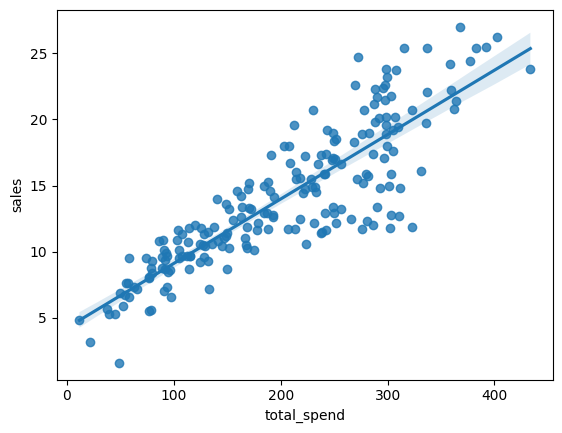

In [76]:
sns.regplot(x='total_spend',y='sales',data=df)

## Polyfit

In [77]:
X = df['total_spend']
y = df['sales']

In [78]:
# Mengeluarkan koefisien!
np.polyfit(X,y,1)

array([0.04868788, 4.24302822])

predicted_sales =  0.04868788*potential_spend + 4.24302822

# Lebih dari 1 Variabel

In [80]:
df = pd.read_csv(io.BytesIO(uploaded['Exercise Chapter 3 Topic 2_ Dataset Advertising (1).csv']))

In [81]:
X = df.drop('sales',axis=1)
y = df['sales']

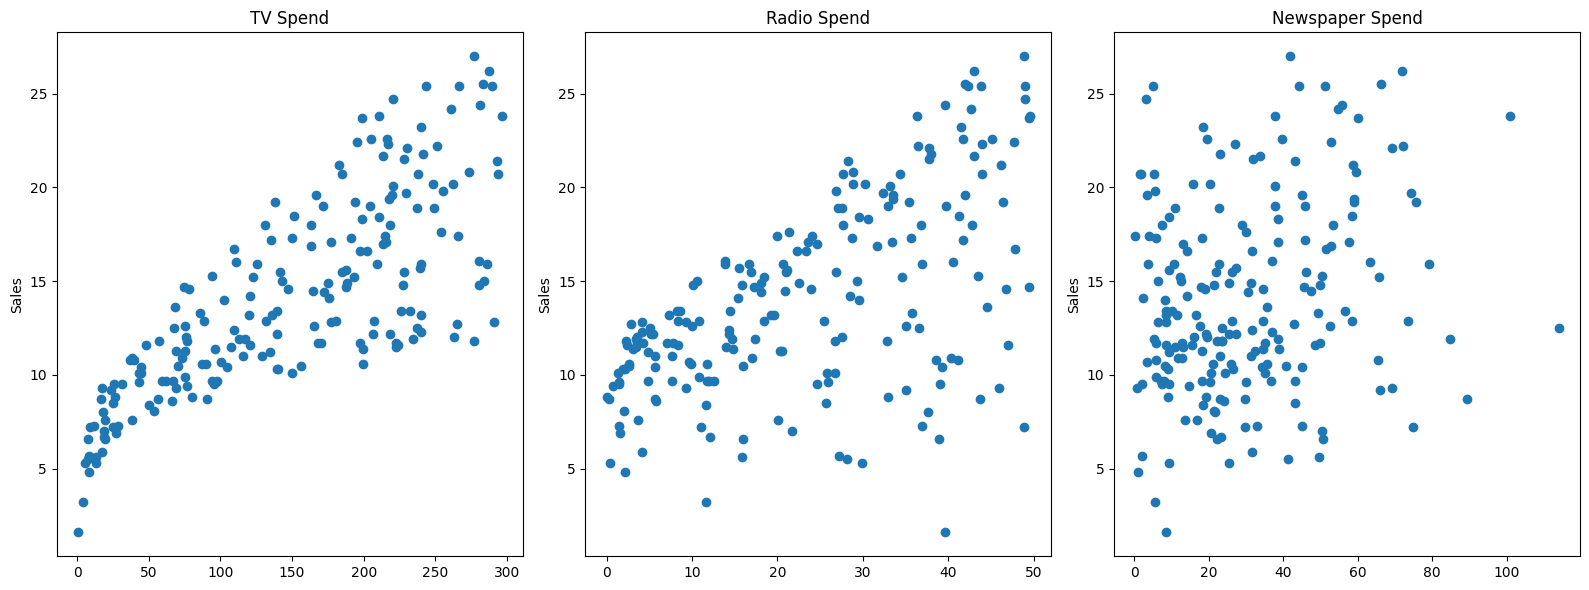

In [82]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

## Train-test split

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Membuat model

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
model = LinearRegression()

In [87]:
model.fit(X_train,y_train)

LinearRegression()

## Menguji model

In [88]:
test_predictions = model.predict(X_test)

In [89]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [90]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)

In [91]:
print(MAE, MSE)

1.213745773614481 2.2987166978863796


## Koefisien

In [92]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.044696
radio,0.187566
newspaper,-0.000323


## Plot prediksi

In [93]:
y_hat = model.predict(X)

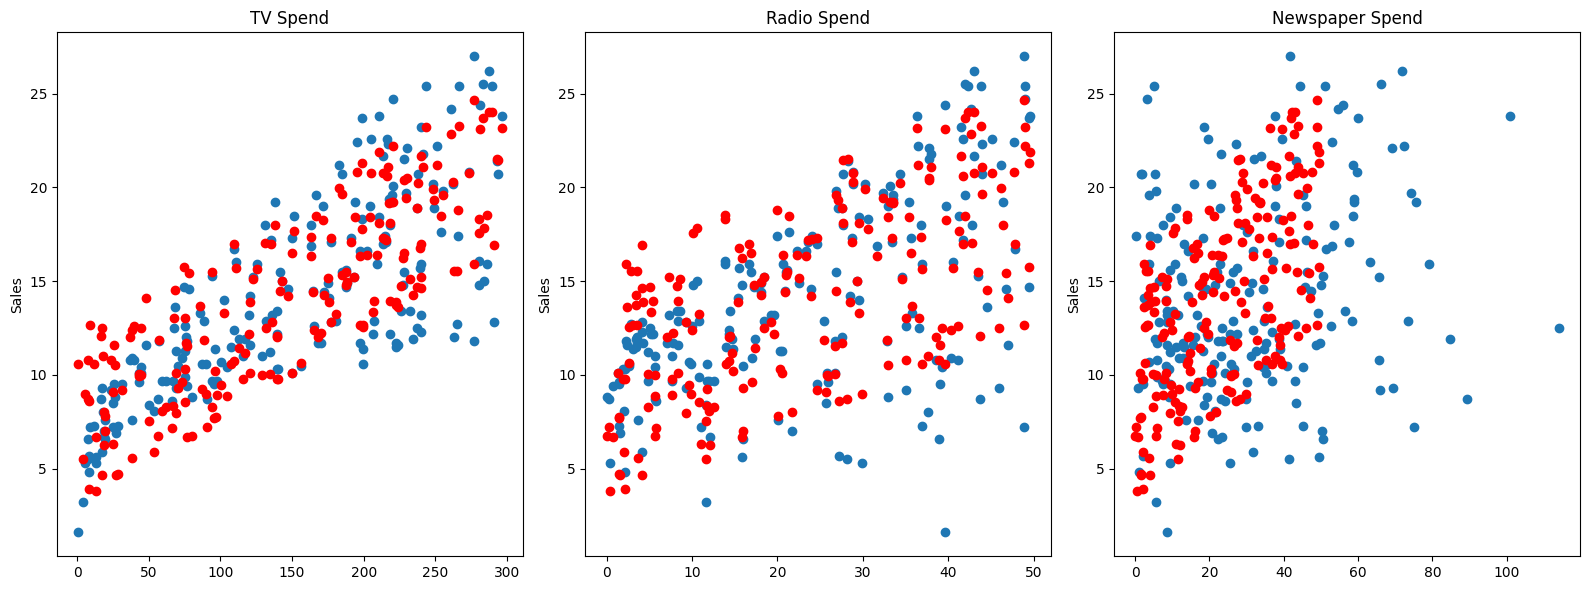

In [94]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();